In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("train",
                                          target_size=(64,64),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("test",
                                          target_size=(64,64),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 7558 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)        

In [ ]:
model.fit(train_dataset, epochs=1, validation_data=test_dataset)

625/625 [==============================] - 153s 245ms/step - loss: 0.1638 - accuracy: 0.9445 - val_loss: 0.1949 - val_accuracy: 0.9316


In [ ]:
model.save('malarialcellclassifier.h5')

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = load_model('malarialcellclassifier.h5')

In [3]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(64,64))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val > 0.5:
        plt.xlabel("Uninfected",fontsize=30)
    else:
        plt.xlabel("Parasitized",fontsize=30)

1/1 [==============================] - 0s 209ms/step
[[0.]]


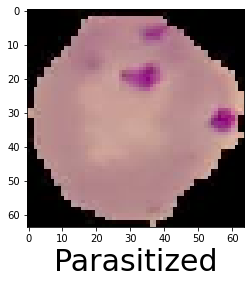

In [4]:
predictImage("parasitized.png")

1/1 [==============================] - 0s 23ms/step
[[0.9997967]]


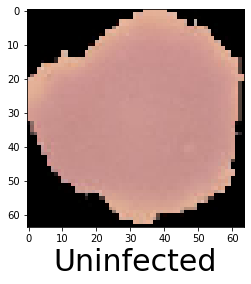

In [6]:
predictImage("uninfected.png")